In [1]:
import asyncio # 비동기처리를 위함
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# shadowDOM 인 경우 활용할 수 있음
# def expand_shadow_element(element):
#     shadow_root = driver.execute_script('return arguments[0].shadowRoot', element)
#     return shadow_root
# # arr에는 shadow DOM 각각의 상위 태그 및 selector 정보를 순서대로 넣기
# # target에는 최종적으로 찾고자하는 selector 넣기
# def find_element_in_shadowDOMs(arr, target):
#     curr_root = driver
#     root, shadow_root = None, None
#     for info in arr:
#         root = curr_root.find_element_by_css_selector(info)
#         shadow_root = expand_shadow_element(root)
#         curr_root = shadow_root
    
#     return curr_root.find_element_by_css_selector(target)
# # chrome://settings/content/javascript 페이지에서 사용할것.
# def toggleJavascriptAllow():
#     arr = ["settings-ui",
#        "#container > settings-main", 
#        "settings-basic-page", 
#        "#basicPage > settings-section.expanded > settings-privacy-page", 
#        "settings-subpage > category-default-setting", 
#        "settings-toggle-button"]
#     find_element_in_shadowDOMs(arr, "#outerRow > #control").click()

In [2]:
# naver blog에서 1~10 페이지까지의 블로그 url 크롤링
def getBlogsURL(driver, term):
    pageIndexes = range(1, 92, 10) # 1~10페이지
    blogs = []
    for pageIndex in pageIndexes:
        driver.get(F"https://search.naver.com/search.naver?where=post&query={term}&start={pageIndex}")
        dirtyURLs = driver.find_elements_by_class_name("sh_blog_top > dl > .txt_block > .inline > .url")
        for url in dirtyURLs:
            blogs.append( url.get_attribute("href") )
    return blogs
        

In [4]:
# 초, By.ID/By.Class등의 타입, 기준요소, 
# 기준요소가 로드될때까지 대기
def waiting(driver, sec, _type ,elem):
    try:
        element = WebDriverWait(driver, sec).until(
            EC.presence_of_element_located((_type, elem))
        )
    except:
        pass

In [5]:
chrome_options = Options()
chrome_options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome("./chromedriver", chrome_options=chrome_options)

<ipython-input-5-d2c94f73e9d5>:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("./chromedriver", chrome_options=chrome_options)


In [6]:
blogsURLs = list(set(getBlogsURL(driver, "test")))

In [9]:
posts = []
for url in blogsURLs:
    try:
        driver.get(url)
        waiting(driver, 3, By.ID, "mainFrame")
        driver.switch_to_frame("mainFrame") # mainframe 내부의 #document로 이동
        post = driver.find_element_by_css_selector("#printPost1 > tbody > tr > td.bcc").text
        posts.append(post)
    except Exception as e: # 네이버 블로그가 아니면 에러.
        print("네이버 블로그가 아님")
        pass 

<ipython-input-9-33bb8f661dfb>:6: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame("mainFrame") # mainframe 내부의 #document로 이동


Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame

Message: mainFrame



In [11]:
posts[:10]

['벌며 배우며\n[Back test] 절대 모멘텀\n배당부자 ・ 2020. 10. 3. 12:36\nURL 복사 이웃추가\nback test는 portfolio visualizer 라는 툴로 손쉽게 할 수 있지만, 엑셀을 이용해서 직접 해볼까 싶어 간단한 것으로 해봤다.\nKODEX200 을 절대모멘텀 전략으로 투자했다면 결과가 어땠을까?\n우선 Kodex200의 과거 주가 데이터가 필요하다.\nGoogle 스프레드시트에서 아래와 같이 입력하면 지정된 날짜 사이의 기간동안의 주간 종가를 구할 수 있다.\n=GOOGLEFINANCE(069500,"price","2015. 1. 1","2020. 9. 28","weekly")\n아래와같이  날자와 주가가 자동 입력된다.\n다음으로 2주전의 가격대비 올랐는지 떨어졌는지 를 구하고, 떨어지는 추세에서 상승반전하면 1, 상승 추세에서 하락반전하면 -1, 추세가 유지되면 0 으로 표시한다.\n추세판별을 위해 요런 식을 만들었다.\n=IF(E7<0 , IF(E8>0,1,0), IF(E8<0,-1,0))\n이 값에 따라서 사거나 파는 것을 계산했는데, 간단히 해보려고 5만원으로 시작해서 1주씩만 샀다 팔았다 하는 것으로 했다.\n결과는 아래와 같다.\n2015년 1월에  1주 사서 쭉 들고 있었다면 4935원을 벌었을텐데 절대모멘텀을 적용했다면 \n8745원을 벌었다.\n매매 수수료를 생각하면 이보다는 좀 더 적겠지만, 괜찮아 보인다. \n매주 리밸런싱을 했더니 매매는 5년간 30 번 발생했다.\n그런데 그래프를 보면 18년 말까지는 절대모멘텀의 수익이 더 낮았고 그 이후에 앞서기 시작하다가 3월 폭락을 지나며 수익률을 벌렸다.\n장기적으로는 절대모멘텀이나 상대모멘텀이 효과가 있다고는 하는데, 몇년씩 나쁜 성과를 내는 구간이 있어서 실제 해보면 잘 유지할 수 있을지 모르겠다.\n모멘텀을 판단하는 기간이나, 리밸런싱 주기, 기초자산의 변화 패턴 등에 따라 성과가 많이 달라서, 동적 자산배분이 결코 쉬운 분야는 아닌것 같다.\

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

In [16]:
wordcloud = WordCloud(font_path="./NanumSquareL.ttf", 
                      background_color='white',
                        stopwords=STOPWORDS
                     ).generate(" ".join(posts))

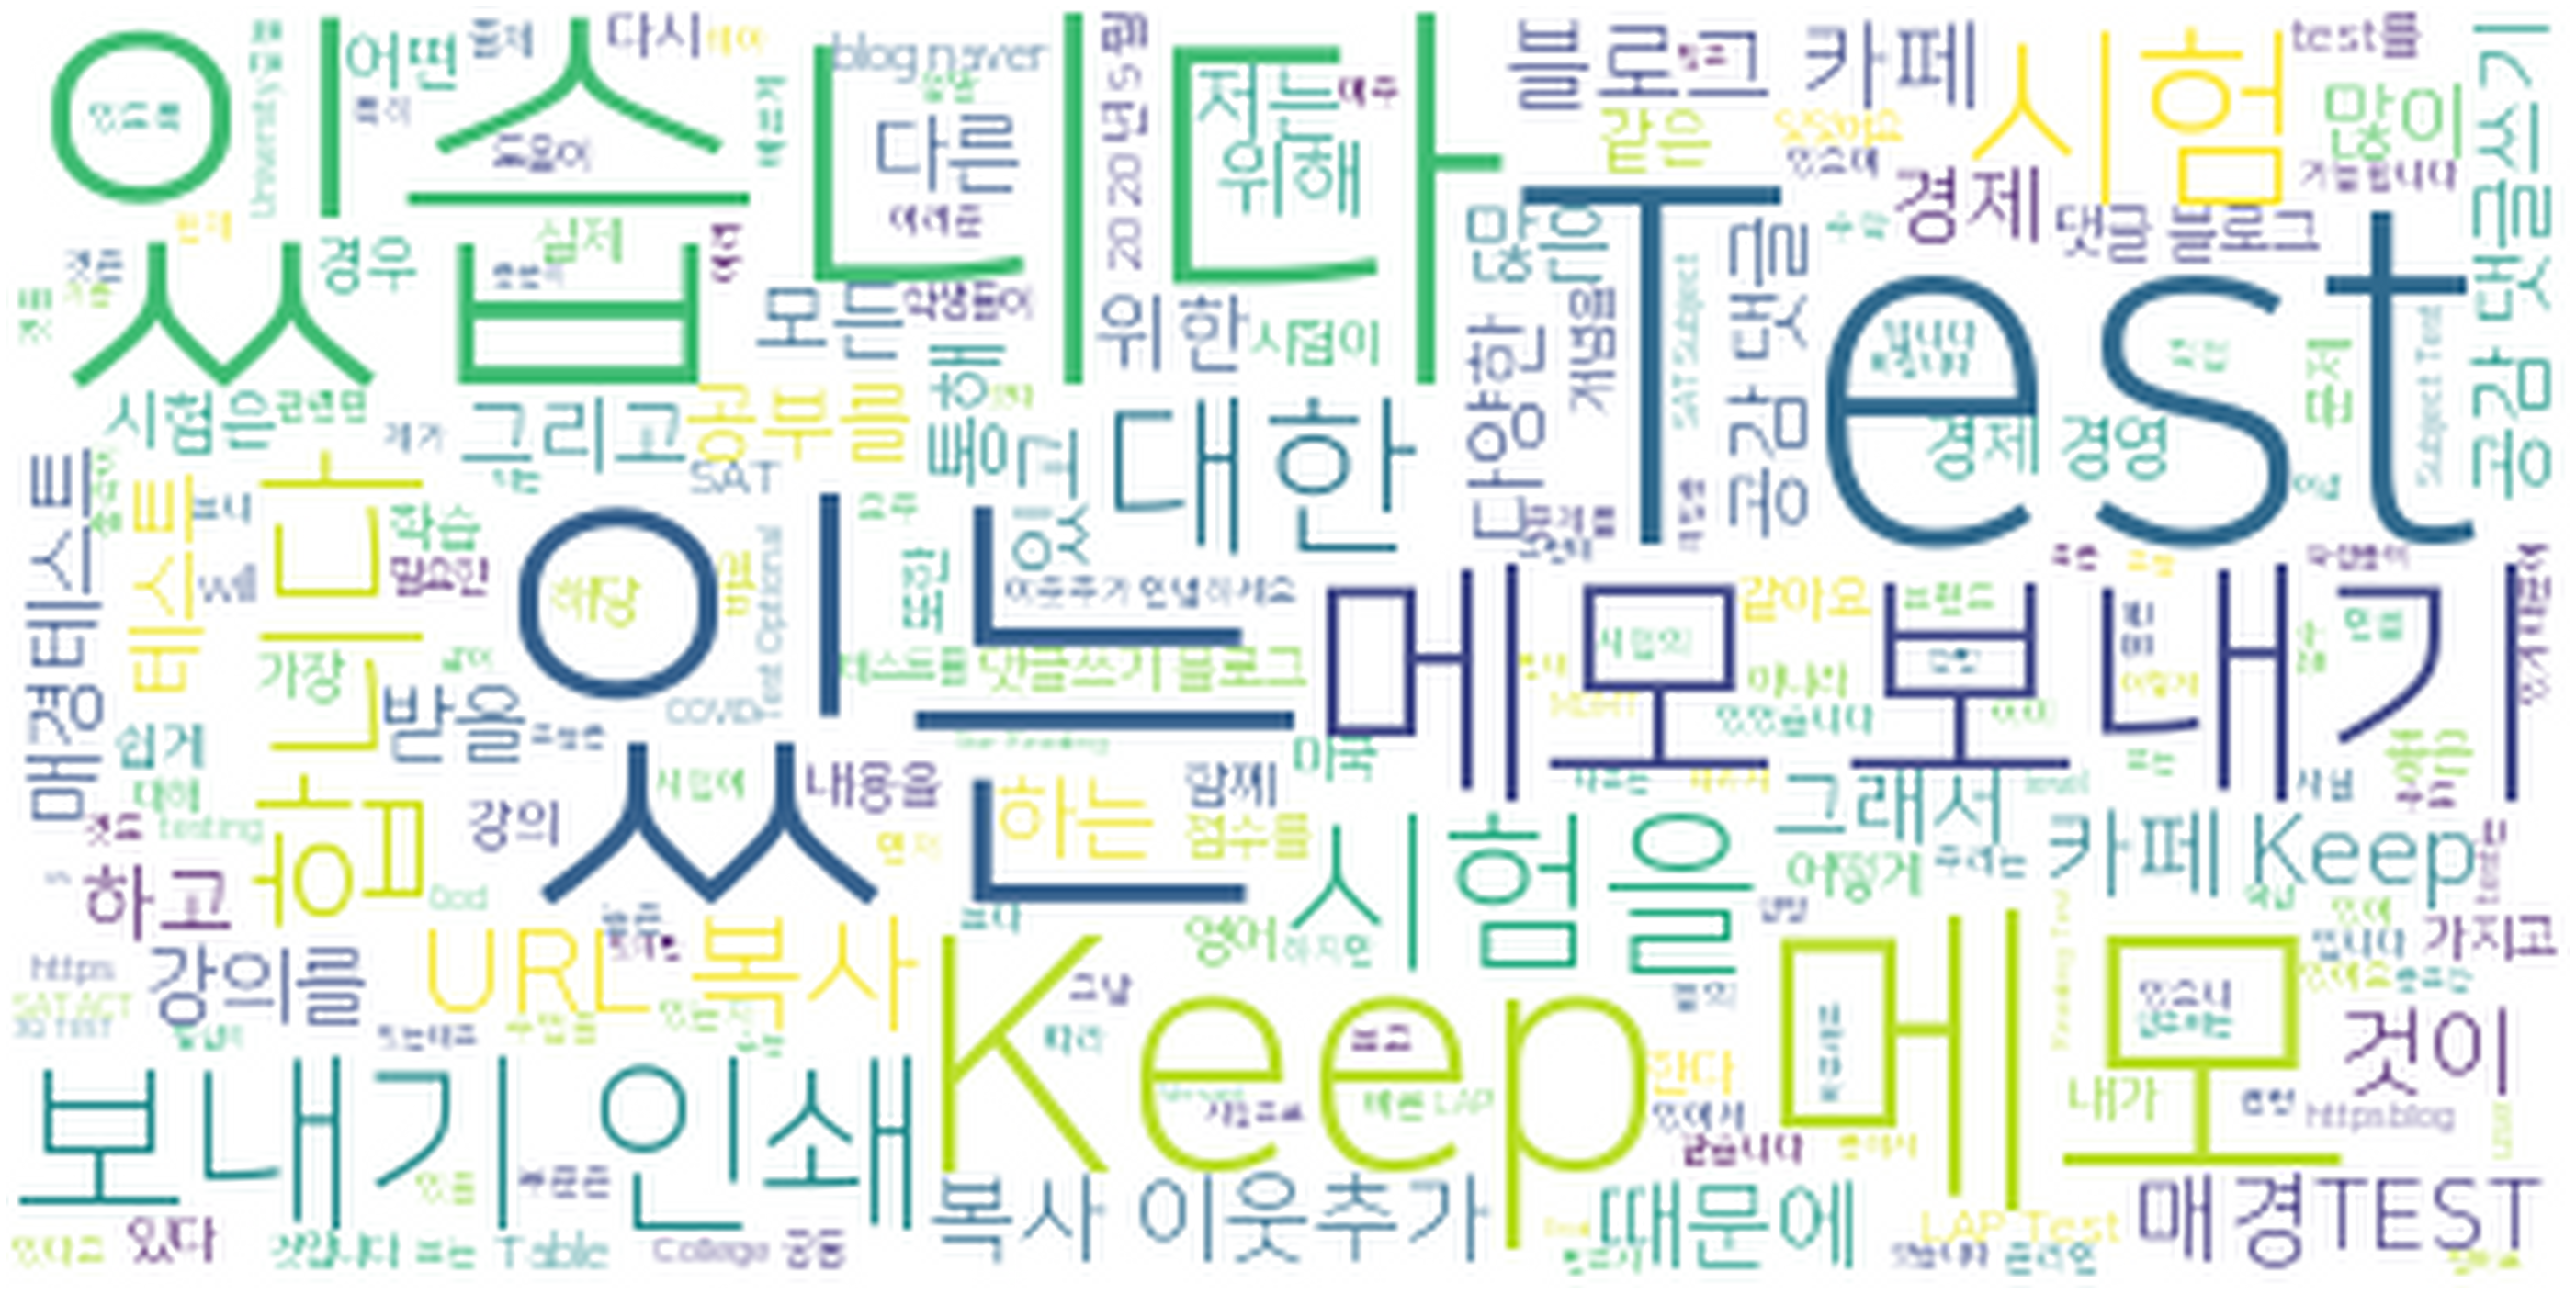

In [17]:
plt.figure(figsize=(50,50)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 
# plt.savefig()

In [18]:
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 10.5 MB/s eta 0:00:01     |███████████████████████████████▊| 19.2 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 401 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 11.3 MB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1
